# importing necessary libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# load the data 

In [ ]:
df=pd.read_csv('Titanic.csv')

# display the first few rows

In [5]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# display the basic information about the data set

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# display the summary statistic of the data set

In [7]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# check for missing values

In [8]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# data cleaning (e.g handling missing values removeing duplicates)

In [9]:
df_cleaned=df.dropna()
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 183 entries, 1 to 889
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  183 non-null    int64  
 1   Survived     183 non-null    int64  
 2   Pclass       183 non-null    int64  
 3   Name         183 non-null    object 
 4   Sex          183 non-null    object 
 5   Age          183 non-null    float64
 6   SibSp        183 non-null    int64  
 7   Parch        183 non-null    int64  
 8   Ticket       183 non-null    object 
 9   Fare         183 non-null    float64
 10  Cabin        183 non-null    object 
 11  Embarked     183 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 18.6+ KB


# checkfor duplicate rows

In [10]:
df_cleaned.duplicated().sum()

np.int64(0)

# if there are duplicates you can remove them 

In [11]:
df_cleaned=df_cleaned.drop_duplicates()

# univariat analysis-distribution of a single feature

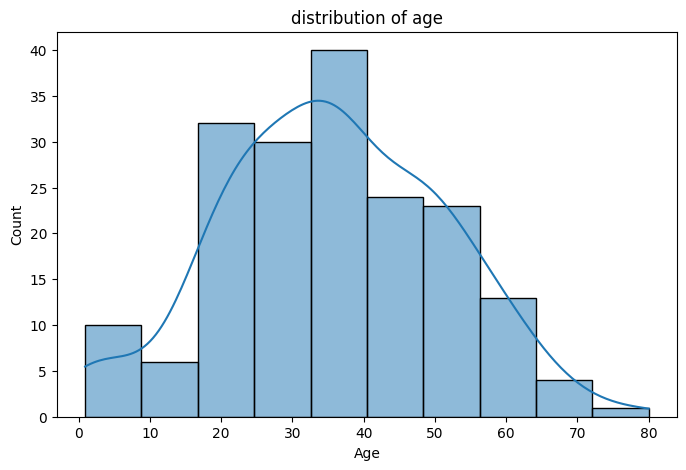

In [12]:
plt.figure(figsize=(8,5))
sns.histplot(df_cleaned['Age'],kde=True)
plt.title('distribution of age')
plt.show()

# Bivariate analysis of relatonship between two features

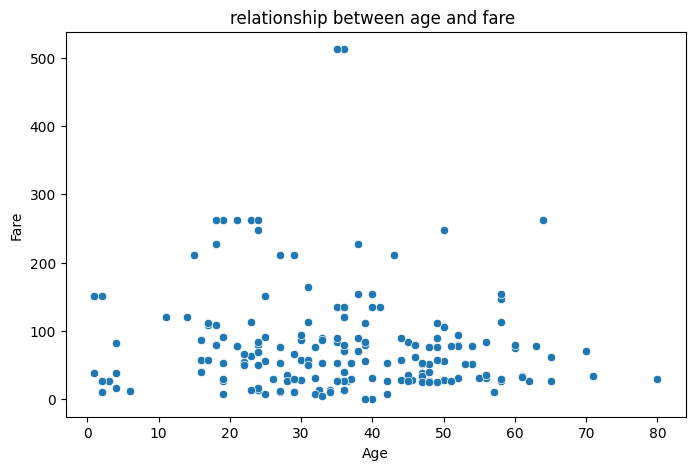

In [27]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='Age',y='Fare',data=df_cleaned)
plt.title('relationship between age and fare ')
plt.show()

# multivariate analysis pairplot

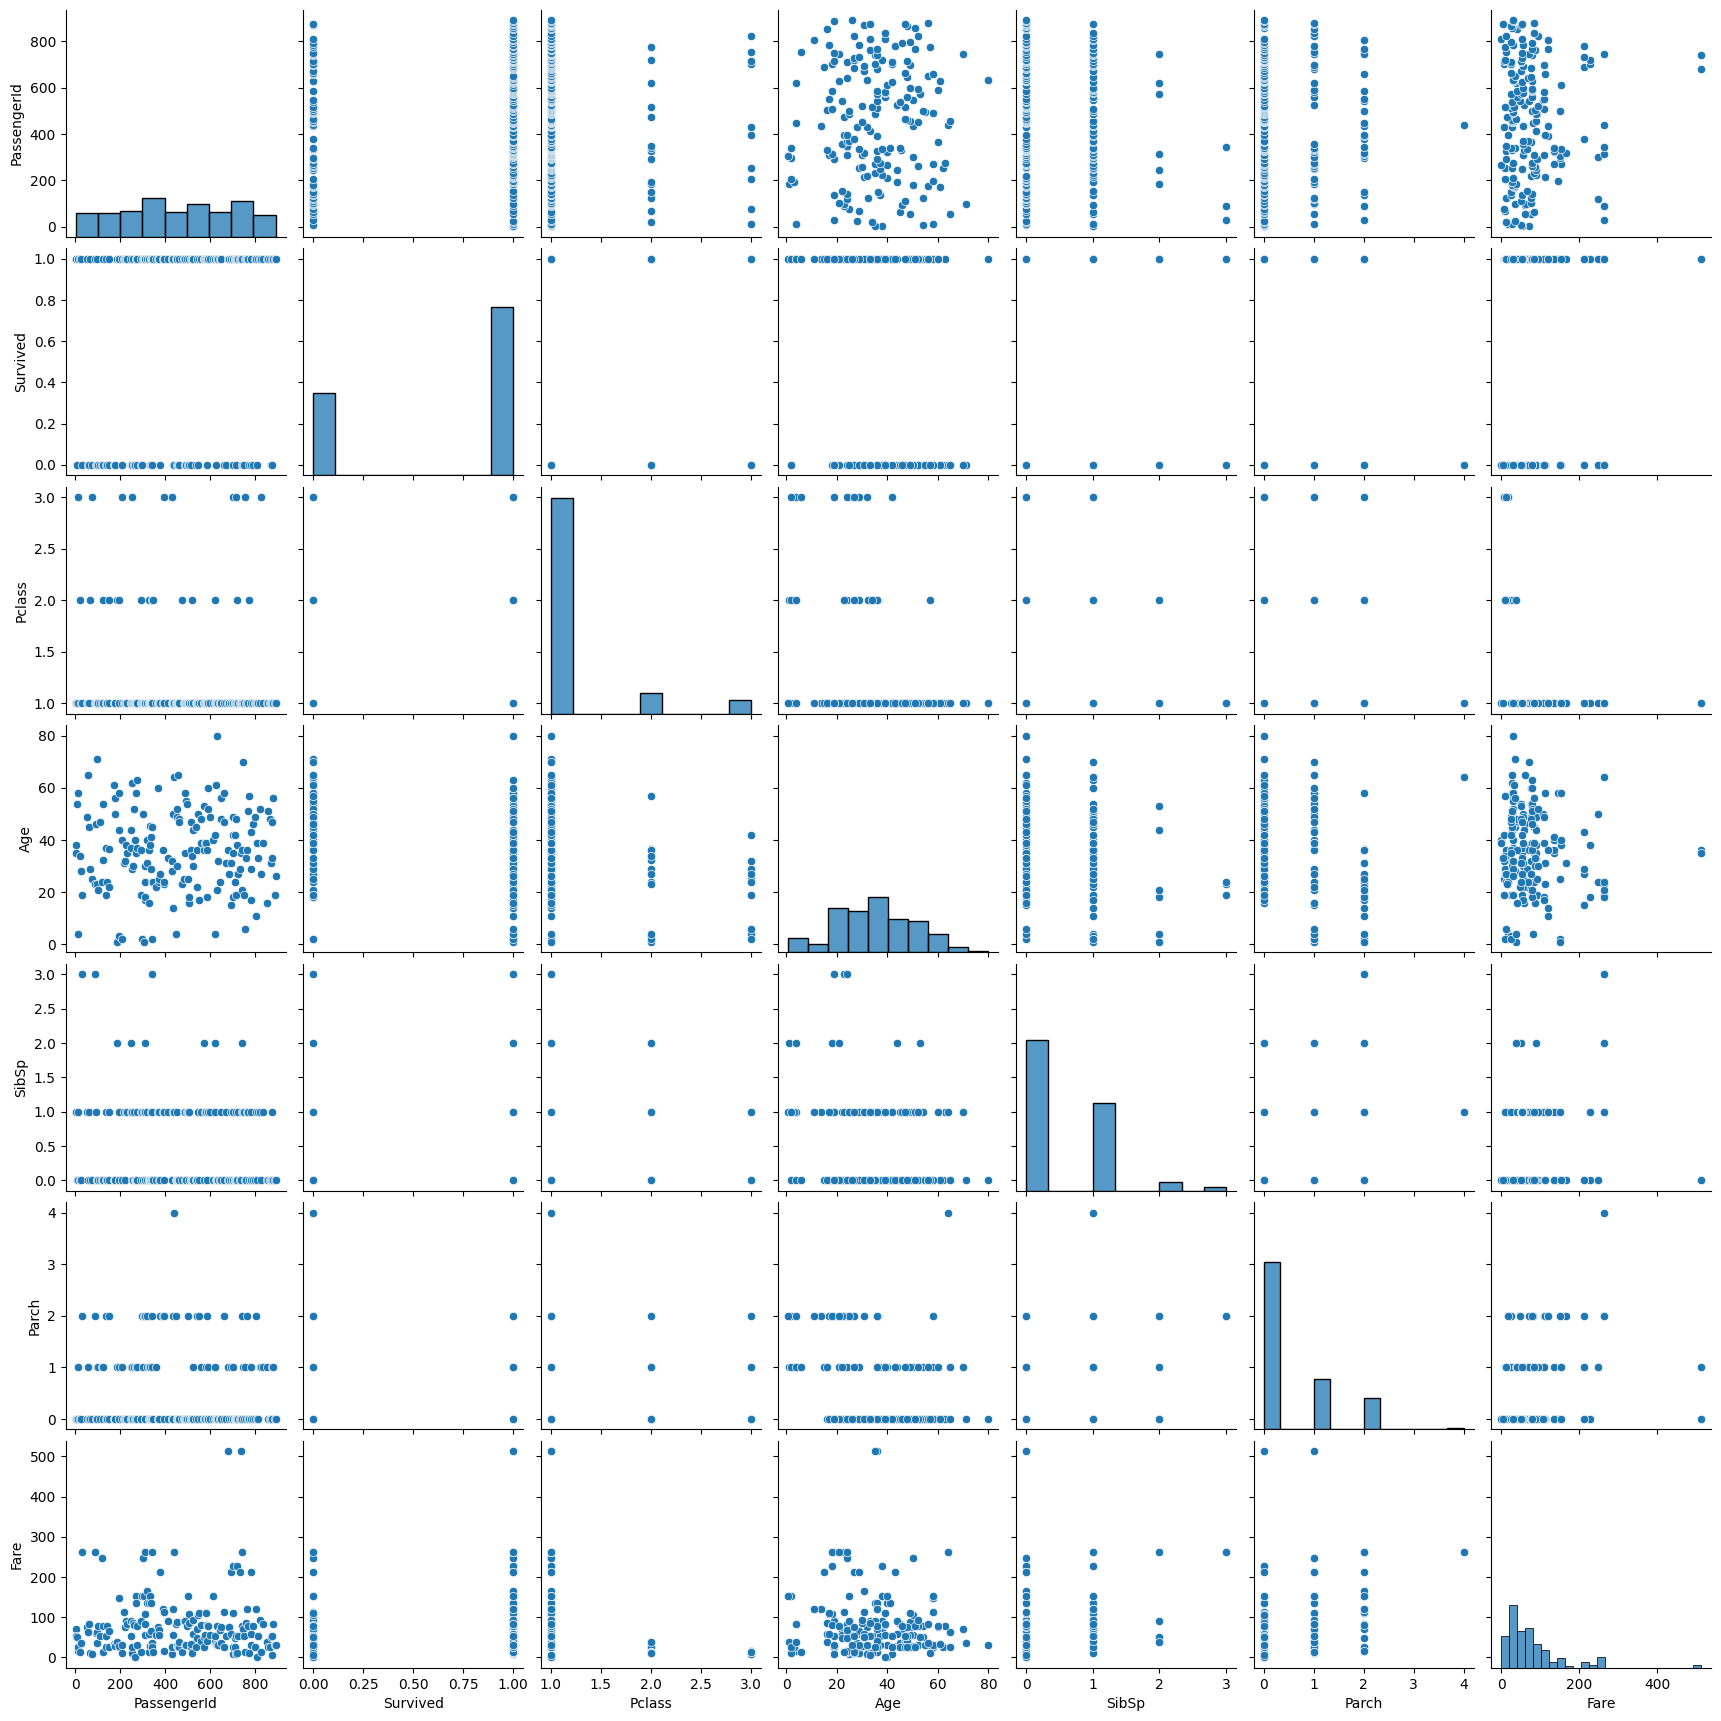

In [30]:
sns.pairplot(df_cleaned)
plt.show()

# correlation matrix and heat map

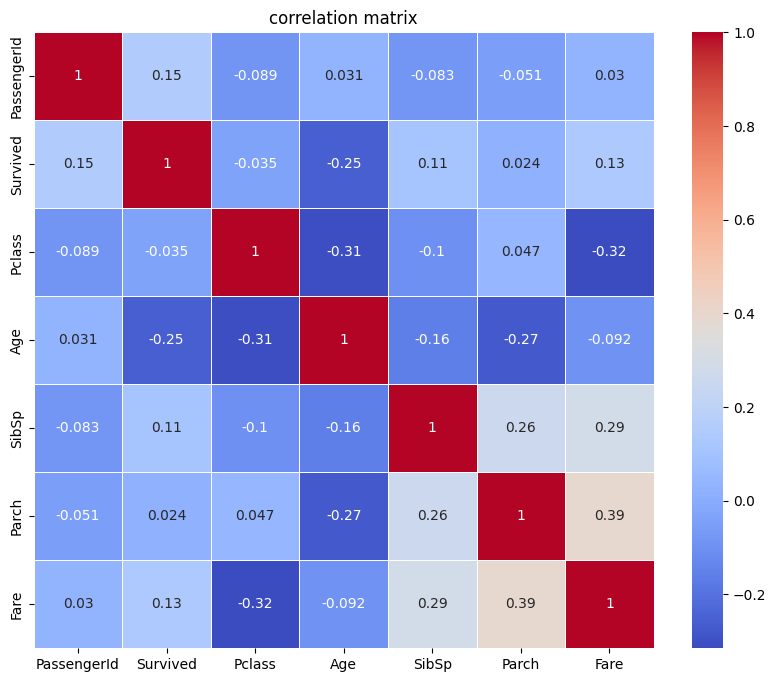

In [47]:
numeric_df=df_cleaned.select_dtypes(include=[np.number]) #taking only numeric columns
correlation_matrix=numeric_df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm',linewidth=0.5)
plt.title('correlation matrix')
plt.show()

# checking for outliers using a box plot

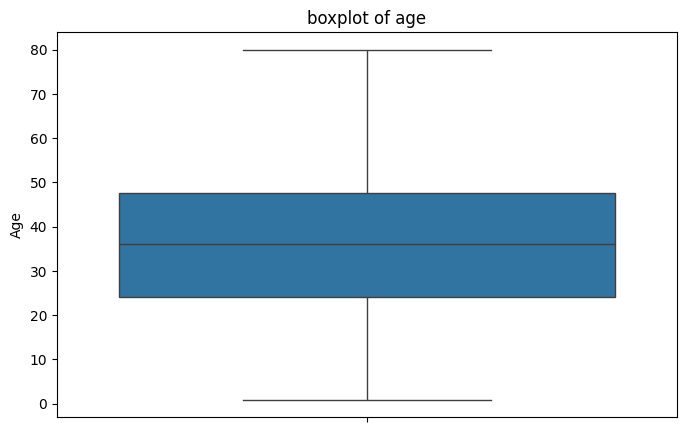

In [37]:
plt.figure(figsize=(8,5))
sns.boxplot(df_cleaned['Age'])
plt.title('boxplot of age')
plt.show()

# categorical feature analysis -count plot

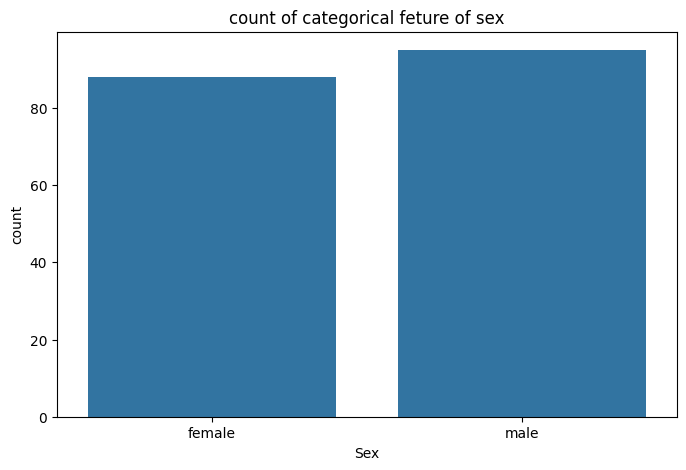

In [39]:
plt.figure(figsize=(8,5))
sns.countplot(x='Sex',data=df_cleaned)
plt.title('count of categorical feture of sex')
plt.show()

# save the cleand data set for further analysis or modeling

In [42]:
df_cleaned.to_csv('cleaned_data.csv',index=False)
print('data saved')

data saved


# if you have target variable and are interested in its didtribution

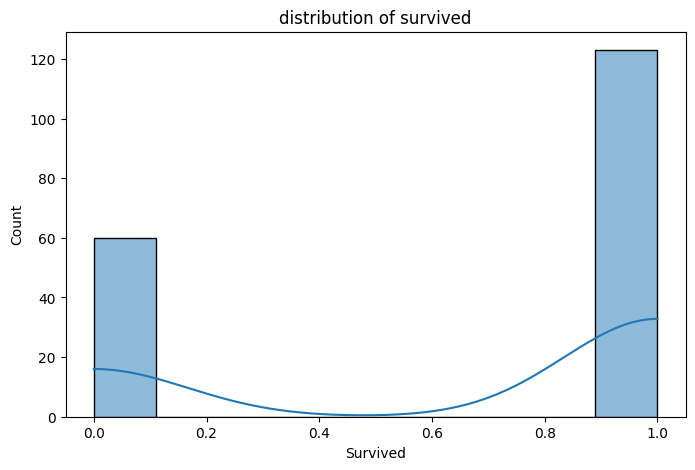

In [46]:
plt.figure(figsize=(8,5))
sns.histplot(df_cleaned['Survived'],kde=True)
plt.title('distribution of survived')
plt.show()